<a href="https://colab.research.google.com/github/Ntsoumou/vigilant-winner/blob/main/crime_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Author: Ntsoumou, Manuel Davy
# License: Attribution required
# Data Source: https://www.baltimorepolice.org/crime-stats/open-data

In [1]:
# Import the pandas library
import pandas as pd

# Read the CSV file into a Pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/crime-baltimore.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
# View the shape of the DataFrame
print("the shape of untouched data from Baltimore police: ", df.shape)

# View the total number of elements in the DataFrame
print("the total number of elements of untouched data from Baltimore police: ", df.size)

the shape of untouched data from Baltimore police:  (544414, 23)
the total number of elements of untouched data from Baltimore police:  12521522


Feature Selection

In [3]:
# create a new dataframe
df_cleaned = pd.DataFrame()

#predictor (y)
df_cleaned['Description'] = df['Description']

#features (X)
df_cleaned['District'] = df['District']
df_cleaned['CrimeDateTime'] = df['CrimeDateTime'] 
df_cleaned['Inside_Outside'] = df['Inside_Outside'] 
df_cleaned['Weapon'] = df['Weapon'].fillna('no_weapon') 
df_cleaned['Gender'] = df['Gender']
df_cleaned['Race'] = df['Race']
df_cleaned['Neighborhood'] = df['Neighborhood']
df_cleaned['Latitude'] = df['Latitude']
df_cleaned['Longitude'] = df['Longitude']
df_cleaned['Age'] = df['Age']

# remove rows with empty cells
df_cleaned.dropna(inplace=True)

#re-index the dataframe
df_cleaned.reset_index(drop=True, inplace=True)


In [5]:
# View the shape of the feature selected DataFrame
print("the shape of the feature selected DataFrame: ", df_cleaned.shape)

# View the total number of elements in the feature selected DataFrame
print("the total number of elements in the feature selected DataFrame: ", df_cleaned.size)

the shape of the feature selected DataFrame:  (366451, 11)
the total number of elements in the feature selected DataFrame:  4030961


Cleaning ['Description']

In [6]:
# Import numpy library
import numpy as np

# Create a list of values to be checked
values = ['AGG. ASSAULT', 'ROBBERY', 'SHOOTING', 
          'COMMON ASSAULT', 'HOMICIDE', 'RAPE', 
          'ROBBERY - CARJACKING']

# Use the `isin()` method to check which rows 
# in the 'Description' column contain one of the values from the `values` list
mask = df_cleaned['Description'].isin(values)

# Use the `where()` function to create the 'nv_v' column
df_cleaned['nv_v'] = np.where(mask, 'violent', 'non_violent')


Cleaning ['CrimeDateTime']

In [7]:
#time_of_day

# convert the column to datetime type, coerce any values that cannot be parsed to NaT
df_cleaned['CrimeDateTime'] = pd.to_datetime(df_cleaned['CrimeDateTime'], 
                                             errors='coerce')

# remove rows with NaT values from the DataFrame
df_cleaned = df_cleaned.dropna()

# convert the column to datetime type
df_cleaned['CrimeDateTime'] = pd.to_datetime(
    df_cleaned['CrimeDateTime'])

# create bins for morning, afternoon, evening, and night
bins = [0, 12, 18, 24]

# create labels for the bins
labels = ['morning', 'afternoon', 'evening']

# use pd.cut() to bin the rows into the specified time intervals
df_cleaned['time_of_day'] = pd.cut(df_cleaned['CrimeDateTime'].dt.hour, 
                                   bins=bins, labels=labels)

<ipython-input-7-aaddb9c4eac9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['CrimeDateTime'] = pd.to_datetime(
<ipython-input-7-aaddb9c4eac9>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['time_of_day'] = pd.cut(df_cleaned['CrimeDateTime'].dt.hour,


In [8]:
# day_of_week

# create bins for each day of the week
bins = [-1, 0, 1, 2, 3, 4, 5, 6]

# create labels for the bins
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# use pd.cut() to bin the rows into the specified day of the week
df_cleaned['day_of_week'] = pd.cut(df_cleaned['CrimeDateTime'].dt.dayofweek, bins=bins, labels=labels)


In [9]:
#month_of_year

# create bins for each month of the year
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# create labels for the bins
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# use pd.cut() to bin the rows into the specified month of the year
df_cleaned['month_of_year'] = pd.cut(df_cleaned['CrimeDateTime'].dt.month, bins=bins, labels=labels)

# remove all rows with at least one empty cell
df_cleaned.dropna(inplace=True)


Cleaning ['Age']

In [10]:
# remove negative values from age
df_cleaned['binned_age'] = df_cleaned['Age'].apply(abs)

# select rows where the 'Age' column is greater than or equal to 120 or less than 1
df_selected = df_cleaned.loc[(df_cleaned['binned_age'] >= 120)]

# drop the selected rows
df_cleaned = df_cleaned.drop(df_selected.index)

df_cleaned['binned_age'].describe()

# create bins for the 'Age' column
bins = [0, 14, 24, 64, 121]
labels = ['child', 'youth', 'adult', 'senior']

# use the pandas.cut() function to create the bins
df_cleaned['binned_age'] = pd.cut(df_cleaned['binned_age'], bins, labels=labels)

# convert the 'Age_bins' column to a string data type
df_cleaned['binned_age'] = df_cleaned['binned_age'].astype(str)

#remove rows with empty cells
df_cleaned.dropna(inplace=True)


Checking ['District'], ['Weapon'], ['Race'], ['Neighborhood']

In [11]:
# District is clean
df_cleaned['cleaned_district'] = df_cleaned['District']

# Weapon is clean
df_cleaned['cleaned_weapon'] = df_cleaned['Weapon']

# Race is clean
df_cleaned['cleaned_race'] = df_cleaned['Race']

# Neighborhood is clean
df_cleaned['cleaned_neighborhood'] = df_cleaned['Neighborhood']

Cleaning ['Gender']

In [12]:
# cleaning gender
mask = df_cleaned['Gender'].isin(["M", "F", "Male", "Female"])

# remove all that are not equal to "M", "F", "Male", "Female"
df_cleaned = df_cleaned.assign(cleaned_gender=df_cleaned['Gender'][mask])

# replace all F with female and all Male with M
df_cleaned['cleaned_gender'].replace({"Female": "F", "Male": "M"}, inplace=True)

#remove rows with empty cells
df_cleaned.dropna(inplace=True)

Cleaning ['Inside_Outside']

In [13]:
# inside-outside cleaning
df_cleaned = df_cleaned.assign(cleaned_inside_outside=df_cleaned['Inside_Outside'].replace({"Inside": "I", "Outside": "O"}))

#remove rows with empty cells
df_cleaned.dropna(inplace=True)


Cleaning ['Longitude'], ['Latitude']

In [14]:
# clean longitude and latitude 

import numpy as np

# calculate the min and max values in the longitude column
lon_min = df_cleaned['Longitude'].min()
lon_max = df_cleaned['Longitude'].max()

# create evenly spaced bins for the longitude values
lon_bins = np.linspace(lon_min, lon_max, 20)

# calculate the min and max values in the latitude column
lat_min = df_cleaned['Latitude'].min()
lat_max = df_cleaned['Latitude'].max()

# create evenly spaced bins for the latitude values
lat_bins = np.linspace(lat_min, lat_max, 20)

# add the bins as new columns in the dataframe
df_cleaned['longitude_binned'] = pd.cut(df_cleaned['Longitude'], lon_bins)
df_cleaned['latitude_binned'] = pd.cut(df_cleaned['Latitude'], lat_bins)


# remove empty cells
df_cleaned = df_cleaned.dropna(subset=['longitude_binned'])
df_cleaned = df_cleaned.dropna(subset=['latitude_binned'])

#convert to strings
df_cleaned['longitude_binned'] = df_cleaned['longitude_binned'].astype(str)
df_cleaned['latitude_binned'] = df_cleaned['latitude_binned'].astype(str)

#remove rows with empty cells
df_cleaned.dropna(inplace=True)

Remove useless columns

In [15]:
# remove useless columns
df_removed = df_cleaned.drop(columns=['Description', 'CrimeDateTime', 'District', 'Inside_Outside', 'Weapon',
       'Gender', 'Race', 'Neighborhood', 'Latitude', 'Longitude', 'Age'])

In [16]:
# display columns in df_removed
df_removed.columns

Index(['nv_v', 'time_of_day', 'day_of_week', 'month_of_year', 'binned_age',
       'cleaned_district', 'cleaned_weapon', 'cleaned_race',
       'cleaned_neighborhood', 'cleaned_gender', 'cleaned_inside_outside',
       'longitude_binned', 'latitude_binned'],
      dtype='object')

In [33]:
# View the shape of the df_removed DataFrame
print("the shape of the df_removed DataFrame: ", df_removed.shape)

# View the total number of elements in df_removed DataFrame
print("the total number of elements in df_removed DataFrame: ", df_removed.size)

the shape of the df_removed DataFrame:  (346649, 13)
the total number of elements in df_removed DataFrame:  4506437


Encoding 

In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# create a new dataframe
df_encoded = pd.DataFrame()

# create a LabelEncoder instance
le = LabelEncoder()

# label encoding
df_encoded['cleaned_gender'] = le.fit_transform(
    df_removed['cleaned_gender'])
df_encoded['cleaned_inside_outside'] = le.fit_transform(
    df_removed['cleaned_inside_outside'])

# create a OneHotEncoder instance
ohe = OneHotEncoder(handle_unknown='ignore')

# one hot encoding
df_encoded = ohe.fit_transform(df_removed[['time_of_day', 
                                           'binned_age', 'month_of_year', 
                                           'cleaned_district', 'cleaned_weapon',
                                           'cleaned_race', 'cleaned_neighborhood', 
                                           'longitude_binned', 'latitude_binned']])

In [38]:
# View the shape of the df_encoded DataFrame
print("The shape of the df_encoded DataFrame: ", df_encoded.shape)

# View the total number of elements in df_encoded DataFrame
print("The total number of elements in df_encoded DataFrame:: ", df_encoded.size)

The shape of the df_encoded DataFrame:  (346649, 373)
The total number of elements in df_encoded DataFrame::  3119841


Dimensionality Reduction with TruncatedSVD

In [43]:
from sklearn.decomposition import TruncatedSVD

# Fit and transform the encoded data using SVD
svd = TruncatedSVD(n_components=5)
svd_encoded = svd.fit_transform(df_encoded)

# Print the explained variance ratio of the resulting components
print(svd.explained_variance_ratio_)


[0.01478071 0.06661343 0.05390044 0.0467612  0.03935562]


In [44]:
# View the shape of the svd_encoded DataFrame
print("The shape of the svd_encoded DataFrame: ", svd_encoded.shape)

# View the total number of elements in svd_encoded DataFrame
print("The total number of elements in svd_encoded DataFrame:: ", svd_encoded.size)

The shape of the svd_encoded DataFrame:  (346649, 5)
The total number of elements in svd_encoded DataFrame::  1733245


Ranking importance of features using XGBoost

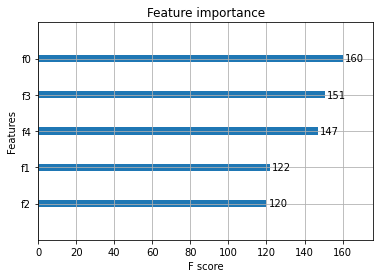

In [45]:
import xgboost as xgb

# Assume you have a matrix of training data, X, and a vector of labels, y
model = xgb.XGBClassifier()
xgb_ranked = model.fit(svd_encoded, df_removed['nv_v'])

# Now you can obtain the feature importances using the `feature_importances_` attribute
importances = model.feature_importances_

# Visualize the feature importances using the `plot_importance()` function
xgb.plot_importance(model, importance_type="weight", max_num_features=5)


In [46]:
# Obtain the feature importances from the model
importances = model.feature_importances_

# Sort the indices of the array based on the feature importances
sorted_indices = np.argsort(importances)[::-1]

# Select the top 5 features using the sorted indices
top_3_indices = sorted_indices[:3]
xgb_ranked = svd_encoded[:, top_3_indices]


In [47]:
# View the shape of the xgb_ranked DataFrame
print("The shape of the xgb_ranked DataFrame: ", xgb_ranked.shape)

# View the total number of elements in xgb_ranked DataFrame
print("The total number of elements in xgb_ranked DataFrame:: ", xgb_ranked.size)

The shape of the xgb_ranked DataFrame:  (346649, 3)
The total number of elements in xgb_ranked DataFrame::  1039947


Split Data

In [54]:
# define X
X = xgb_ranked
# define y
y = df_removed['nv_v']


# Import the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42) # stratify stratify=y


Tune DecisionTreeClassifier using GridSearchCV to optimize hyperparameters

In [56]:
# Import the GridSearchCV class from the sklearn.model_selection module
from sklearn.model_selection import GridSearchCV

# Import the DecisionTreeClassifier class from the sklearn.tree module
from sklearn.tree import DecisionTreeClassifier

# Create a list of possible values for the hyperparameters
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 8, 11],
    'criterion': ['gini', 'entropy']
}

# Create a decision tree model
decisionTreeModel = DecisionTreeClassifier()

# Use the GridSearchCV class to perform a grid search
grid_search = GridSearchCV(decisionTreeModel, param_grid, cv=5, 
                           scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print(grid_search.best_params_)

## Apply best model to the test data and output accuracy

# Import the confusion_matrix function from the sklearn.metrics module
from sklearn.metrics import classification_report, confusion_matrix

# Use the predict() method to generate predictions for the test data
DecisionTreePredictions = grid_search.predict(X_test)


{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 2}


In [57]:
from sklearn.metrics import accuracy_score
# Use the classification_report() function to calculate the evaluation metrics for each class
decisionTreeCR = classification_report(y_test, DecisionTreePredictions)

# Print the classification_report
print(decisionTreeCR)

# Use the confusion_matrix() function to calculate the confusion matrix
decisionTreeCM = confusion_matrix(y_test, DecisionTreePredictions)

# Print the confusion_matrix
print(decisionTreeCM)

# Use the accuracy_score() function to calculate the accuracy_score
decisionTreeAccuracy = accuracy_score(y_test, DecisionTreePredictions)
# Print the confusion_matrix
print(decisionTreeAccuracy)


              precision    recall  f1-score   support

 non_violent       0.75      0.93      0.83     37549
     violent       0.89      0.63      0.73     31781

    accuracy                           0.79     69330
   macro avg       0.82      0.78      0.78     69330
weighted avg       0.81      0.79      0.79     69330

[[34970  2579]
 [11856 19925]]
0.7917928746574354


Tune RandomForestClassifier using GridSearchCV to optimize hyperparameters

In [58]:
# Import the GridSearchCV class from the sklearn.model_selection module
from sklearn.model_selection import GridSearchCV

# Import the RandomForestClassifier class from the sklearn.ensemble module
from sklearn.ensemble import RandomForestClassifier

# Create a list of possible values for the hyperparameters
param_grid = {
    'n_estimators': [1, 2, 5, 10, 50, 100],
}

# Create a Random Forest model
randomForestModel = RandomForestClassifier()

# Use the GridSearchCV class to perform a grid search
grid_search = GridSearchCV(randomForestModel, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print(grid_search.best_params_)

# Import the confusion_matrix function from the sklearn.metrics module
from sklearn.metrics import classification_report, confusion_matrix

# Use the predict() method to generate predictions for the test data
randomForestPredictions = grid_search.predict(X_test)


{'n_estimators': 100}


In [59]:
# Use the classification_report() function to calculate the evaluation metrics for each class
randomForestCR = classification_report(y_test, randomForestPredictions)

# Print the classification_report
print(randomForestCR)

# Use the confusion_matrix() function to calculate the confusion matrix
randomForestCM = confusion_matrix(y_test, randomForestPredictions)

# Print the confusion_matrix
print(randomForestCM)

# Use the accuracy_score() function to calculate the accuracy_score
randomForestAccuracy = accuracy_score(y_test, randomForestPredictions)
# Print the confusion_matrix
print(randomForestAccuracy)

              precision    recall  f1-score   support

 non_violent       0.75      0.85      0.80     37549
     violent       0.80      0.67      0.73     31781

    accuracy                           0.77     69330
   macro avg       0.77      0.76      0.76     69330
weighted avg       0.77      0.77      0.77     69330

[[32100  5449]
 [10549 21232]]
0.7692485215635367


Tune KNeighborsClassifier using GridSearchCV to optimize hyperparameters

In [60]:
# KNeighborsClassifier --> DONE 

from sklearn.model_selection import GridSearchCV

# Import the KNeighborsClassifier class from the sklearn.neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Create a list of possible values for the hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
}

# Create a K-Nearest Neighbors model
kNeighborsModel = KNeighborsClassifier()

# Use the GridSearchCV class to perform a grid search
grid_search = GridSearchCV(kNeighborsModel, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print(grid_search.best_params_)

# Use the best hyperparameters to make predictions on the test set
predictions = grid_search.predict(X_test)

## Apply best model to the test data and output accuracy

# Import the confusion_matrix function from the sklearn.metrics module
from sklearn.metrics import classification_report, confusion_matrix

# Use the predict() method to generate predictions for the test data
kNeighborsPredictions = grid_search.predict(X_test)

# output: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

{'n_neighbors': 9}


In [61]:
# Use the classification_report() function to calculate the evaluation metrics for each class
kNeighborsCR = classification_report(y_test, kNeighborsPredictions)

# Print the classification_report
print(kNeighborsCR)

# Use the confusion_matrix() function to calculate the confusion matrix
kNeighborsCM = confusion_matrix(y_test, kNeighborsPredictions)

# Print the confusion_matrix
print(kNeighborsCM)

# Use the accuracy_score() function to calculate the accuracy_score
kNeighborsAccuracy = accuracy_score(y_test, kNeighborsPredictions)
# Print the confusion_matrix
print(kNeighborsAccuracy)


              precision    recall  f1-score   support

 non_violent       0.75      0.88      0.81     37549
     violent       0.82      0.66      0.73     31781

    accuracy                           0.78     69330
   macro avg       0.79      0.77      0.77     69330
weighted avg       0.79      0.78      0.78     69330

[[33074  4475]
 [10805 20976]]
0.779604788691764


Tune GaussianNB using GridSearchCV to optimize hyperparameters

In [63]:
# GaussianNB --> keep

# Import the GridSearchCV class from the sklearn.model_selection module
from sklearn.model_selection import GridSearchCV

# Import the GaussianNB class from the sklearn.naive_bayes module
from sklearn.naive_bayes import GaussianNB

# Create a list of possible values for the hyperparameters
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# Create a Naive Bayes model
naiveBayesModel = GaussianNB()

# Use the GridSearchCV class to perform a grid search
grid_search = GridSearchCV(naiveBayesModel, param_grid, cv=5, scoring='accuracy') 
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print(grid_search.best_params_)

# Use the best hyperparameters to make predictions on the test set
naiveBayesPredictions = grid_search.predict(X_test)

{'var_smoothing': 1e-09}


In [64]:
# Use the classification_report() function to calculate the evaluation metrics for each class
naiveBayesCR = classification_report(y_test, naiveBayesPredictions)

# Print the classification_report
print(naiveBayesCR)

# Use the confusion_matrix() function to calculate the confusion matrix
naiveBayesCM = confusion_matrix(y_test, naiveBayesPredictions)

# Print the confusion_matrix
print(naiveBayesCM)

# Use the accuracy_score() function to calculate the accuracy_score
naiveBayesAccuracy = accuracy_score(y_test, naiveBayesPredictions)
# Print the confusion_matrix
print(naiveBayesAccuracy)


              precision    recall  f1-score   support

 non_violent       0.74      0.79      0.77     37549
     violent       0.73      0.67      0.70     31781

    accuracy                           0.74     69330
   macro avg       0.74      0.73      0.73     69330
weighted avg       0.74      0.74      0.74     69330

[[29772  7777]
 [10486 21295]]
0.7365786816673878


Tune MLPClassifier using GridSearchCV to optimize hyperparameters

In [66]:
# MLPClassifier

# Import the MLPClassifier class from the sklearn.neural_network module
from sklearn.neural_network import MLPClassifier

# Create a list of possible values for the hyperparameters
param_grid = {
    'hidden_layer_sizes': [(10,10), (100,100), (10,10,10)],
}

# Create a Multi-Layer Perceptron model
mlpClassifierModel = MLPClassifier()

# Use the GridSearchCV class to perform a grid search
grid_search = GridSearchCV(mlpClassifierModel, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print(grid_search.best_params_)

## Apply best model to the test data and output accuracy

# Import the confusion_matrix function from the sklearn.metrics module
from sklearn.metrics import classification_report, confusion_matrix

# Use the predict() method to generate predictions for the test data
mlpClassifierPredictions = grid_search.predict(X_test)


{'hidden_layer_sizes': (100, 100)}


In [69]:

# Use the classification_report() function to calculate the evaluation metrics for each class
mlpClassifierCR = classification_report(y_test, mlpClassifierPredictions)

# Print the classification_report
print(mlpClassifierCR)

# Use the confusion_matrix() function to calculate the confusion matrix
mlpClassifierCM = confusion_matrix(y_test, mlpClassifierPredictions)

# Print the confusion_matrix
print(mlpClassifierCM)

# Use the accuracy_score() function to calculate the accuracy_score
mlpClassifierAccuracy = accuracy_score(y_test, mlpClassifierPredictions)
# Print the confusion_matrix
print(mlpClassifierAccuracy)


              precision    recall  f1-score   support

 non_violent       0.75      0.93      0.83     37549
     violent       0.89      0.64      0.74     31781

    accuracy                           0.80     69330
   macro avg       0.82      0.78      0.79     69330
weighted avg       0.81      0.80      0.79     69330

[[34980  2569]
 [11583 20198]]
0.7958748016731574


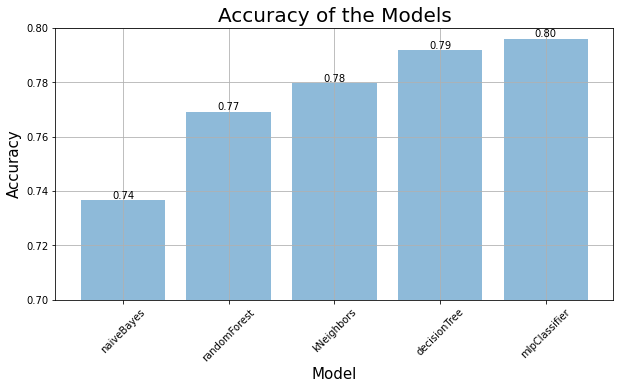

In [105]:
import matplotlib.pyplot as plt

accuracies = [decisionTreeAccuracy, kNeighborsAccuracy, mlpClassifierAccuracy, naiveBayesAccuracy, randomForestAccuracy]
model_labels = ['decisionTree', 'kNeighbors', 'mlpClassifier', 'naiveBayes', 'randomForest']

# Sort the data in ascending order
sorted_accuracies, sorted_labels = zip(*sorted(zip(accuracies, model_labels)))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))

plt.xticks(rotation=45)
plt.grid()

plt.title('Accuracy of the Models', fontsize=20)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

# Plot the sorted data and set the y-axis limits for the plot
bars = ax.bar(sorted_labels, sorted_accuracies, align='center', alpha=0.5)
plt.ylim([0.7, 0.8])

# Add value labels to the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, '%.2f' % height, ha='center', va='bottom')
